In [1]:
## Name: Preeta C.Gandhi
## TP Num: TP056719
## Course: B.Sc. (Hons) Computer Science with Specialism in Data Analytics
## Intake: APD3F2209CS(DA)
## FYP Title: Sentiment Analysis on Book Review: A hybrid approach
## Supervisor : Mr Raheem Mafas
## 2nd Marker : ASSOC. PROF. DR. RAJA RAJESWARI

# IMPORT LIBRARIES & PACKAGES

In [75]:
#!pip install nltk 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import contractions
import string
import re
import collections
import imblearn
import pickle
import warnings
warnings.filterwarnings('ignore')

from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud, STOPWORDS

from collections import Counter

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC


# Install nltk & its necesaary packages
#!pip install nltk 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Load and Read Dataset

In [3]:
data = pd.read_csv('/Users/ASUS/Desktop/FYP/kindle_review.csv')

In [4]:
data.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


# INITIAL DATA EXPLORATION

In [5]:
#Display columns
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'asin', 'helpful', 'rating', 'reviewText',
       'reviewTime', 'reviewerID', 'reviewerName', 'summary',
       'unixReviewTime'],
      dtype='object')

In [6]:
#Explore statistical information
data.describe()

,Unnamed: 0.1,Unnamed: 0,rating,unixReviewTime
count,12000.00000,12000.000000,12000.000000,1.200000e+04
mean,5999.50000,10024.275667,3.250000,1.344537e+09
std,3464.24595,10502.233123,1.421619,4.369374e+07
min,0.00000,0.000000,1.000000,9.602496e+08
25%,2999.75000,2999.750000,2.000000,1.316218e+09
50%,5999.50000,5999.500000,3.500000,1.356826e+09
75%,8999.25000,12475.750000,4.250000,1.376870e+09
max,11999.00000,47770.000000,5.000000,1.405814e+09


In [7]:
#Explore basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    12000 non-null  int64 
 1   Unnamed: 0      12000 non-null  int64 
 2   asin            12000 non-null  object
 3   helpful         12000 non-null  object
 4   rating          12000 non-null  int64 
 5   reviewText      12000 non-null  object
 6   reviewTime      12000 non-null  object
 7   reviewerID      12000 non-null  object
 8   reviewerName    11962 non-null  object
 9   summary         12000 non-null  object
 10  unixReviewTime  12000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.0+ MB


In [8]:
#Get data shape
data.shape

(12000, 11)

In [9]:
#Number of unique product
print("Number of book categories (ID): {}".format(len(data.asin.unique())))
data.asin.unique()

Number of book categories (ID): 2114


array(['B0033UV8HI', 'B002HJV4DE', 'B002ZG96I4', ..., 'B002KFD0VY',
       'B003VYBFZQ', 'B003YDXKB6'], dtype=object)

In [10]:
#Count of ratings
data.rating.value_counts()

5    3000
4    3000
3    2000
2    2000
1    2000
Name: rating, dtype: int64

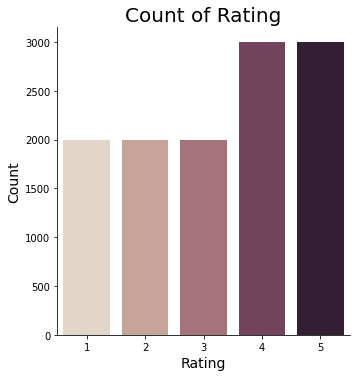

In [11]:
#Plot count of ratings
#pip install seaborn
sns.catplot(data=data, x='rating', kind="count", palette="ch:.25")
plt.title("Count of Rating", fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Rating', fontsize=14)
plt.show()

## Sentiment labelled using Ratings

In [12]:
# Obtain sentiment from Rating column
conditions = [
    data.rating >= 4,
    data.rating == 3,
    data.rating <= 2,
]

values = ['Positive', 'Neutral', 'Negative'] 

data['rating_sentiment'] = np.select(conditions, values)

In [13]:
data.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,rating_sentiment
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600,Neutral
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400,Positive
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400,Neutral
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400,Neutral
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000,Positive


# Exploratory Data Analysis (EDA) (DATA PRE-CLEANING)

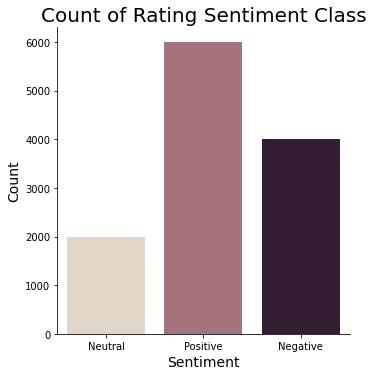

In [14]:
#Plot sentiment categories labelled using ratings
sns.catplot(data=data, x='rating_sentiment', kind="count", palette="ch:.25")
plt.title("Count of Rating Sentiment Class", fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Sentiment', fontsize=14)
plt.show()

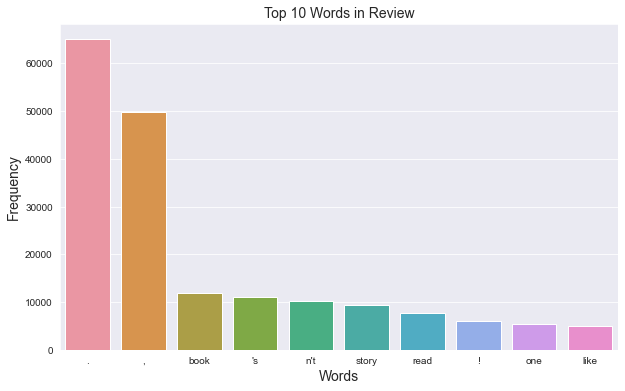

In [15]:
#Plot top 10 most frequent words

# Concatenate all reviews into a single string
reviews = ' '.join(list(data['reviewText']))

# Tokenize the text 
tokens = nltk.word_tokenize(reviews)

# Remove stopwords from the text
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word.lower() not in stop_words]

# Calculate the frequency distribution of the tokens
freq_dist = nltk.FreqDist(tokens)

# Get the top 10 words with highest frequency
top_10_words = freq_dist.most_common(10)

# Create a bar chart using Seaborn
sns.set_style("darkgrid")
sns.set_palette("husl")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=[word for word, freq in top_10_words], y=[freq for word, freq in top_10_words], ax=ax)
ax.set_title("Top 10 Words in Review", fontsize=14)
ax.set_xlabel("Words",fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
plt.show()


In [16]:
data.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,rating_sentiment
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600,Neutral
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400,Positive
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400,Neutral
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400,Neutral
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000,Positive


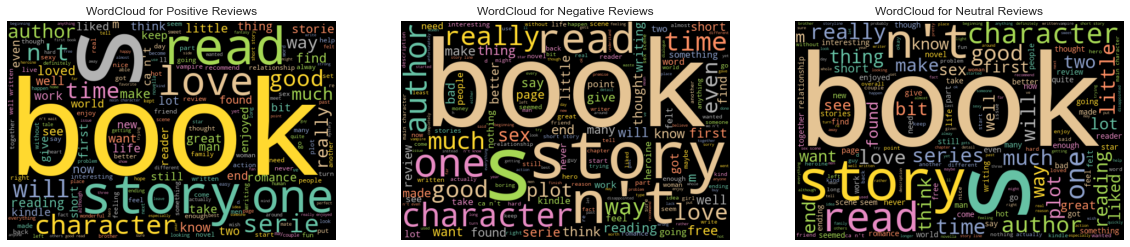

In [17]:
#Word cloud for positive, negative and neutral reviews

# Separate reviews by sentiment class
positive_tokens = data[data['rating_sentiment'] == 'Positive']['reviewText'].apply(lambda x: word_tokenize(x.lower()))
negative_tokens = data[data['rating_sentiment'] == 'Negative']['reviewText'].apply(lambda x: word_tokenize(x.lower()))
neutral_tokens = data[data['rating_sentiment'] == 'Neutral']['reviewText'].apply(lambda x: word_tokenize(x.lower()))

# Flatten the token lists
positive_tokens = [item for sublist in positive_tokens for item in sublist]
negative_tokens = [item for sublist in negative_tokens for item in sublist]
neutral_tokens = [item for sublist in neutral_tokens for item in sublist]

# Create word clouds for each sentiment class
positive_wordcloud = WordCloud(width=600, height=400, background_color='black', colormap='Set2', stopwords=STOPWORDS).generate(' '.join(positive_tokens))
negative_wordcloud = WordCloud(width=600, height=400, background_color='black', colormap='Set2', stopwords=STOPWORDS).generate(' '.join(negative_tokens))
neutral_wordcloud = WordCloud(width=600, height=400, background_color='black', colormap='Set2', stopwords=STOPWORDS).generate(' '.join(neutral_tokens))

# Plot the word clouds
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].imshow(positive_wordcloud, interpolation='bilinear')
axs[0].set_title('WordCloud for Positive Reviews')
axs[0].axis('off')
axs[1].imshow(negative_wordcloud, interpolation='bilinear')
axs[1].set_title('WordCloud for Negative Reviews')
axs[1].axis('off')
axs[2].imshow(neutral_wordcloud, interpolation='bilinear')
axs[2].set_title('WordCloud for Neutral Reviews')
axs[2].axis('off')
plt.show()

Largest word count: 2156, Frequency: 1
Smallest word count: 1, Frequency: 1


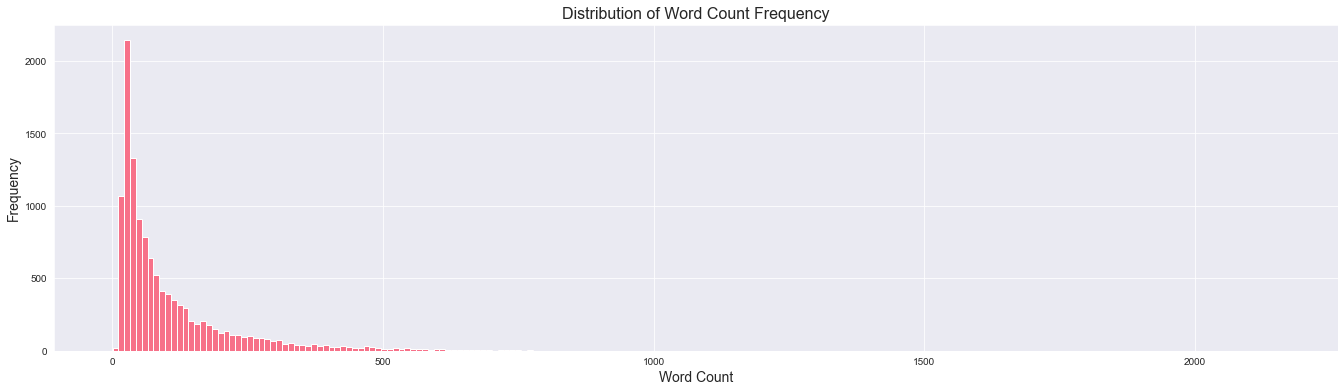

In [18]:
#Plot for distribution of word cound frequency

# Calculate the word count for each review and add it as a new column
data['word_count'] = data['reviewText'].apply(lambda x: len(str(x).split()))

# Count the frequency of each word count
word_count_freq = data['word_count'].value_counts()

# Find the largest and smallest word counts
largest_word_count = data['word_count'].max()
smallest_word_count = data['word_count'].min()

# Get the corresponding frequencies
largest_word_count_freq = word_count_freq[largest_word_count]
smallest_word_count_freq = word_count_freq[smallest_word_count]

# Sort the word count frequencies by their index 
word_count_freq = word_count_freq.sort_index()

# Print the results
print('Largest word count: {}, Frequency: {}'.format(largest_word_count, largest_word_count_freq))
print('Smallest word count: {}, Frequency: {}'.format(smallest_word_count, smallest_word_count_freq))

# Plot a histogram of the word count frequencies
plt.figure(figsize=(23, 6))
plt.hist(data['word_count'], bins=200, density=False)
plt.title('Distribution of Word Count Frequency',fontsize=16)
plt.xlabel('Word Count',fontsize=14)
plt.ylabel('Frequency',fontsize=14)

# Set the y-axis limits to show all bars
plt.ylim(0, max(plt.gca().get_ylim()))
plt.show()

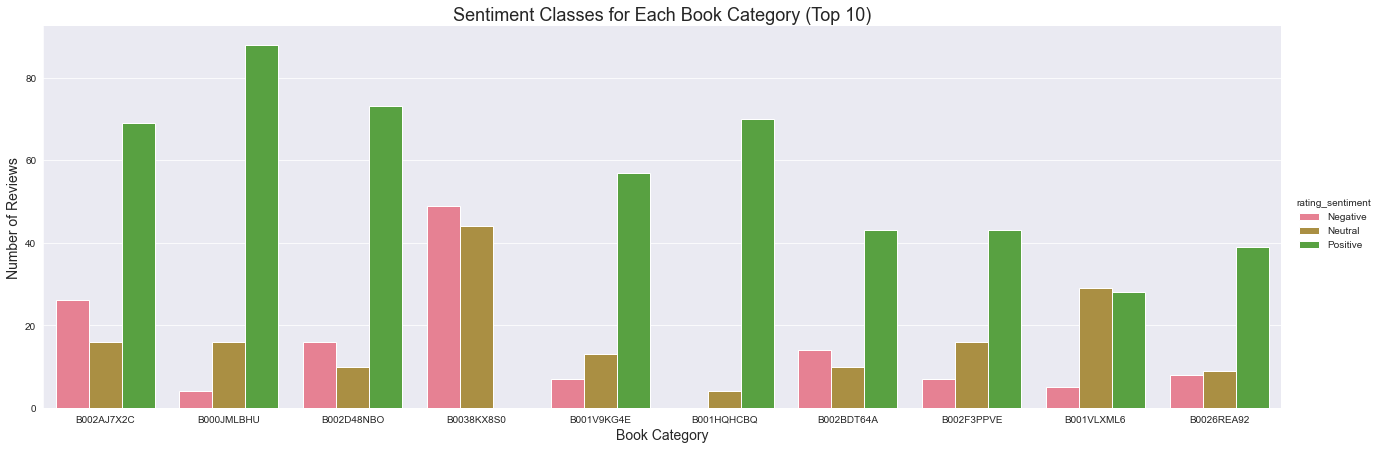

In [19]:
#Plot graph for top sentiment classes for each book ID based on top 10
    
# Get the top 10 book categories by count
top_asin = data['asin'].value_counts().nlargest(10).index.tolist()

# Filter the dataset to only include the top 10 book categories
data_top_asin = data[data['asin'].isin(top_asin)]

# Group the data by book category and sentiment, and count the number of reviews in each group
sentiment_counts = data_top_asin.groupby(['asin', 'rating_sentiment']).size().reset_index(name='count')

# Calculate the total count of reviews for each book category and sort the categories by the total count in descending order
category_counts = sentiment_counts.groupby('asin')['count'].sum().sort_values(ascending=False).index.tolist()
sentiment_counts['asin'] = pd.Categorical(sentiment_counts['asin'], categories=category_counts)

# Plot the bar chart using seaborn
sns.catplot(x='asin', y='count', hue='rating_sentiment', data=sentiment_counts, kind='bar', height=6, aspect=3)

# Set the labels and title
sns.set(font_scale=1.5)
plt.xlabel('Book Category', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.title('Sentiment Classes for Each Book Category (Top 10)')

# Show the plot
plt.show()

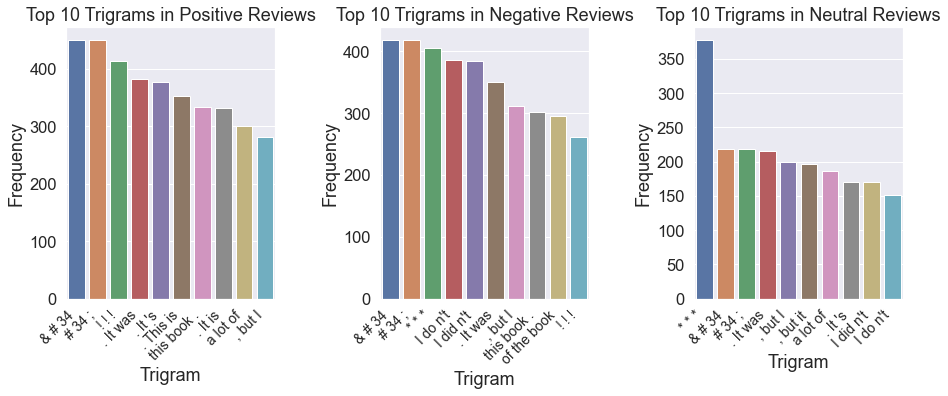

In [20]:
#Top 10 most frequent trigram words for each sentiment class

# Divide the dataset into three separate datasets based on sentiment class
positive_reviews = data[data['rating_sentiment'] == 'Positive']
negative_reviews = data[data['rating_sentiment'] == 'Negative']
neutral_reviews = data[data['rating_sentiment'] == 'Neutral']

# Define a function to plot the top 10 trigrams for a given dataset
def plot_top_trigrams(dataset, title, ax):
    # Tokenize the text data and extract trigrams
    trigrams = ngrams(word_tokenize(dataset['reviewText'].sum()), 3)

    # Count the frequency of each trigram
    trigrams_freq = collections.Counter(trigrams)

    # Select the top 10 most common trigrams
    top_trigrams = trigrams_freq.most_common(10)

    # Separate the trigrams and their frequencies
    trigrams = [' '.join(t) for t, count in top_trigrams]
    frequencies = [count for t, count in top_trigrams]

    # Create a bar plot of the frequencies using Seaborn
    sns.barplot(x=trigrams, y=frequencies, ax=ax)

    # Add labels and a title to the plot
    ax.set(xlabel='Trigram', ylabel='Frequency', title=title)

    # Rotate the x-axis labels for readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=14)

# Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the top 10 trigrams for each sentiment class
plot_top_trigrams(positive_reviews, 'Top 10 Trigrams in Positive Reviews', axs[0])
plot_top_trigrams(negative_reviews, 'Top 10 Trigrams in Negative Reviews', axs[1])
plot_top_trigrams(neutral_reviews, 'Top 10 Trigrams in Neutral Reviews', axs[2])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Show the plots
plt.show()

# SENTIMENT LABELLED USING VADER

In [21]:
#Import VADER library from NLTK
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [22]:
#Remove url links
data['reviewRemoveURL'] = data['reviewText'].apply(lambda x: re.sub(r'https?://\S+', '',  str(x)))

In [23]:
#Perform vader sentiment scoring
data['vader_score']=data['reviewRemoveURL'].apply(lambda x: sia.polarity_scores(str(x)))
data.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,rating_sentiment,word_count,reviewRemoveURL,vader_score
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600,Neutral,541,"Jace Rankin may be short, but he's nothing to ...","{'neg': 0.129, 'neu': 0.708, 'pos': 0.163, 'co..."
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400,Positive,69,Great short read. I didn't want to put it dow...,"{'neg': 0.044, 'neu': 0.673, 'pos': 0.283, 'co..."
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400,Neutral,76,I'll start by saying this is the first of four...,"{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'comp..."
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400,Neutral,54,Aggie is Angela Lansbury who carries pocketboo...,"{'neg': 0.078, 'neu': 0.851, 'pos': 0.07, 'com..."
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000,Positive,20,I did not expect this type of book to be in li...,"{'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'comp..."


In [24]:
#Create columns from vader result
data['positive_score']=data['vader_score'].apply(lambda pos_dict:pos_dict['pos'])
data['neutral_score']=data['vader_score'].apply(lambda neu_dict:neu_dict['neu'])
data['negative_score']=data['vader_score'].apply(lambda neg_dict:neg_dict['neg'])
data['compound_score']=data['vader_score'].apply(lambda score_dict:score_dict['compound'])
data.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,rating_sentiment,word_count,reviewRemoveURL,vader_score,positive_score,neutral_score,negative_score,compound_score
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600,Neutral,541,"Jace Rankin may be short, but he's nothing to ...","{'neg': 0.129, 'neu': 0.708, 'pos': 0.163, 'co...",0.163,0.708,0.129,0.9559
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400,Positive,69,Great short read. I didn't want to put it dow...,"{'neg': 0.044, 'neu': 0.673, 'pos': 0.283, 'co...",0.283,0.673,0.044,0.9645
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400,Neutral,76,I'll start by saying this is the first of four...,"{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'comp...",0.138,0.862,0.000,0.8555
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400,Neutral,54,Aggie is Angela Lansbury who carries pocketboo...,"{'neg': 0.078, 'neu': 0.851, 'pos': 0.07, 'com...",0.070,0.851,0.078,-0.1280
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000,Positive,20,I did not expect this type of book to be in li...,"{'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'comp...",0.139,0.861,0.000,0.4404


In [25]:
#Create pos,neu,neg cols 
def vader_score(compound):
    if compound >= 0.05:
        return "Positive"
    elif compound <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [26]:
# Create sentiment col
data['vader_sentiment'] = data['compound_score'].apply(lambda x: vader_score(x))
data.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,rating_sentiment,word_count,reviewRemoveURL,vader_score,positive_score,neutral_score,negative_score,compound_score,vader_sentiment
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600,Neutral,541,"Jace Rankin may be short, but he's nothing to ...","{'neg': 0.129, 'neu': 0.708, 'pos': 0.163, 'co...",0.163,0.708,0.129,0.9559,Positive
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400,Positive,69,Great short read. I didn't want to put it dow...,"{'neg': 0.044, 'neu': 0.673, 'pos': 0.283, 'co...",0.283,0.673,0.044,0.9645,Positive
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400,Neutral,76,I'll start by saying this is the first of four...,"{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'comp...",0.138,0.862,0.000,0.8555,Positive
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400,Neutral,54,Aggie is Angela Lansbury who carries pocketboo...,"{'neg': 0.078, 'neu': 0.851, 'pos': 0.07, 'com...",0.070,0.851,0.078,-0.1280,Negative
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000,Positive,20,I did not expect this type of book to be in li...,"{'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'comp...",0.139,0.861,0.000,0.4404,Positive


In [27]:
#Get count of sentiment classes from VADER
data['vader_sentiment'].value_counts()

Positive    9286
Negative    2432
Neutral      282
Name: vader_sentiment, dtype: int64

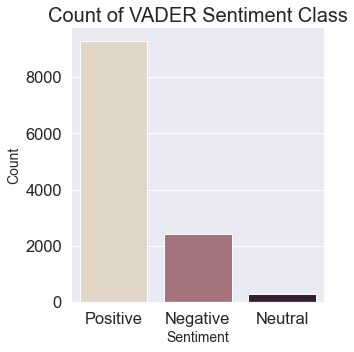

In [28]:
#Plot count of VADER sentiment class
sns.catplot(data=data, x="vader_sentiment", kind="count", palette="ch:.25")
plt.title("Count of VADER Sentiment Class", fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Sentiment', fontsize=14)
plt.show()

# DATA PRE-PROCESSING

In [29]:
#Drop unrequired columns
data=data.drop(columns=['Unnamed: 0','Unnamed: 0.1','asin', 'helpful', 'rating', 'reviewTime', 'reviewerID', 'reviewerName', 'summary', 'unixReviewTime', 'word_count','reviewRemoveURL', 'vader_score', 'positive_score', 'neutral_score', 'negative_score', 'compound_score'])

In [30]:
#Rename column
data.rename(columns={'reviewText':'review'}, inplace = True)
data

,review,rating_sentiment,vader_sentiment
0,"Jace Rankin may be short, but he's nothing to ...",Neutral,Positive
1,Great short read. I didn't want to put it dow...,Positive,Positive
2,I'll start by saying this is the first of four...,Neutral,Positive
3,Aggie is Angela Lansbury who carries pocketboo...,Neutral,Negative
4,I did not expect this type of book to be in li...,Positive,Positive
...,...,...,...
11995,Valentine cupid is a vampire- Jena and Ian ano...,Positive,Positive
11996,I have read all seven books in this series. Ap...,Positive,Positive
11997,This book really just wasn't my cuppa. The si...,Neutral,Positive
11998,"tried to use it to charge my kindle, it didn't...",Negative,Negative


In [31]:
# Normalization: Convert to lower case
data['reviewLC'] = data['review'].str.lower()
data['reviewLC']

0        jace rankin may be short, but he's nothing to ...
1        great short read.  i didn't want to put it dow...
2        i'll start by saying this is the first of four...
3        aggie is angela lansbury who carries pocketboo...
4        i did not expect this type of book to be in li...
                               ...                        
11995    valentine cupid is a vampire- jena and ian ano...
11996    i have read all seven books in this series. ap...
11997    this book really just wasn't my cuppa.  the si...
11998    tried to use it to charge my kindle, it didn't...
11999    taking instruction is a look into the often hi...
Name: reviewLC, Length: 12000, dtype: object

In [32]:
# Change negative words eg. can't -> cannot
#import sys  
#!{sys.executable} -m pip install contractions
data['reviewContraFix'] = data['reviewLC'].apply(contractions.fix)
data['reviewContraFix']

0        jace rankin may be short, but he is nothing to...
1        great short read.  i did not want to put it do...
2        i will start by saying this is the first of fo...
3        aggie is angela lansbury who carries pocketboo...
4        i did not expect this type of book to be in li...
                               ...                        
11995    valentine cupid is a vampire- jena and ian ano...
11996    i have read all seven books in this series. ap...
11997    this book really just was not my cuppa.  the s...
11998    tried to use it to charge my kindle, it did no...
11999    taking instruction is a look into the often hi...
Name: reviewContraFix, Length: 12000, dtype: object

In [33]:
#Remove url links
data['reviewNoURL'] = data['reviewContraFix'].apply(lambda text: re.sub(r'https?://\S+', ' ',  str(text)))
data['reviewNoURL'][2]

"i will start by saying this is the first of four books so i was not expecting it to &#34;conclude&#34;. it centers on 3 children, alex and his younger brother argus, and alex's friend, sapphire. they find a name on a bus map that they cannot find and so the mystery starts. well written with good character development although lots of room still for more.it is quite a short book so i will be moving onto book 2 swiftly."

In [34]:
# Remove numbers & non-word characters 
data['reviewWordsOnly'] = data['reviewNoURL'].apply(lambda text: re.sub(r'[^\w\s]|[\d]+', ' ', text))
data['reviewWordsOnly'][2]

'i will start by saying this is the first of four books so i was not expecting it to     conclude      it centers on   children  alex and his younger brother argus  and alex s friend  sapphire  they find a name on a bus map that they cannot find and so the mystery starts  well written with good character development although lots of room still for more it is quite a short book so i will be moving onto book   swiftly '

In [35]:
#Ensure single space between words
data['reviewSingleSpace'] = data['reviewWordsOnly'].apply(lambda text: re.sub(r'\s{2,}', ' ', text))
data['reviewSingleSpace'][2]

'i will start by saying this is the first of four books so i was not expecting it to conclude it centers on children alex and his younger brother argus and alex s friend sapphire they find a name on a bus map that they cannot find and so the mystery starts well written with good character development although lots of room still for more it is quite a short book so i will be moving onto book swiftly '

In [36]:
# Tokenization
data['reviewTokenized'] = data['reviewSingleSpace'].apply(word_tokenize)
print(data['reviewTokenized'][17])

['how', 'many', 'times', 'is', 'author', 'going', 'to', 'get', 'amazon', 'to', 'delete', 'this', 'or', 'add', 'comments', 'about', 'alleged', 'conspiracies', 'of', 'people', 'out', 'to', 'get', 'him', 'is', 'he', 'f', 'in', 'delusional', 'my', 'review', 'i', 'have', 'to', 'agree', 'with', 'a', 'few', 'previous', 'reviewers', 'the', 'author', 'does', 'not', 'know', 'the', 'basic', 'mechanics', 'of', 'writing', 'so', 'how', 'in', 'the', 'world', 'is', 'this', 'or', 'any', 'other', 'he', 'is', 'written', 'full', 'stars', 'there', 'is', 'not', 'a', 'page', 'that', 'is', 'not', 'filled', 'with', 'grammar', 'problems', 'the', 'story', 'itself', 'suffers', 'the', 'same', 'problems', 'from', 'the', 'author', 's', 'inattention', 'to', 'detail', 'characters', 'are', 'inconsistent', 'in', 'their', 'actions', 'it', 'is', 'like', 'they', 'are', 'interchangeable', 'pegs', 'on', 'a', 'board', 'the', 'author', 'puts', 'into', 'places', 'when', 'he', 'needs', 'them']


In [37]:
# Remove words less than 3
data['reviewRemoveLessThanThreeWords'] = data['reviewTokenized'].apply(lambda text: [word for word in text if len(word) > 2])
print(data['reviewRemoveLessThanThreeWords'][17])

['how', 'many', 'times', 'author', 'going', 'get', 'amazon', 'delete', 'this', 'add', 'comments', 'about', 'alleged', 'conspiracies', 'people', 'out', 'get', 'him', 'delusional', 'review', 'have', 'agree', 'with', 'few', 'previous', 'reviewers', 'the', 'author', 'does', 'not', 'know', 'the', 'basic', 'mechanics', 'writing', 'how', 'the', 'world', 'this', 'any', 'other', 'written', 'full', 'stars', 'there', 'not', 'page', 'that', 'not', 'filled', 'with', 'grammar', 'problems', 'the', 'story', 'itself', 'suffers', 'the', 'same', 'problems', 'from', 'the', 'author', 'inattention', 'detail', 'characters', 'are', 'inconsistent', 'their', 'actions', 'like', 'they', 'are', 'interchangeable', 'pegs', 'board', 'the', 'author', 'puts', 'into', 'places', 'when', 'needs', 'them']


In [38]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
wordnet_pos = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text)
    return [lemmatizer.lemmatize(word, wordnet_pos.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text if len(pos) >= 1]

data['lemmatize_review'] = data['reviewRemoveLessThanThreeWords'].apply(lambda text: lemmatize_words(text))
#.apply(lambda text: ' '.join(lemmatize_words(text)))
print(data['lemmatize_review'][17])

['how', 'many', 'time', 'author', 'go', 'get', 'amazon', 'delete', 'this', 'add', 'comment', 'about', 'alleged', 'conspiracy', 'people', 'out', 'get', 'him', 'delusional', 'review', 'have', 'agree', 'with', 'few', 'previous', 'reviewer', 'the', 'author', 'do', 'not', 'know', 'the', 'basic', 'mechanic', 'write', 'how', 'the', 'world', 'this', 'any', 'other', 'write', 'full', 'star', 'there', 'not', 'page', 'that', 'not', 'fill', 'with', 'grammar', 'problem', 'the', 'story', 'itself', 'suffer', 'the', 'same', 'problem', 'from', 'the', 'author', 'inattention', 'detail', 'character', 'be', 'inconsistent', 'their', 'action', 'like', 'they', 'be', 'interchangeable', 'peg', 'board', 'the', 'author', 'put', 'into', 'place', 'when', 'need', 'them']


In [39]:
# Remove stopwords (make sure negative words excluded in list)
sw = stopwords.words('english')
print("Length of NLTK stopwords list is: ", len(sw))

#Create customized stopword list that exclude negative words from nltk stop word list
# This includes most common word as found from EDA which are related to book domain: "book, read, character, story" that does not contribute to sentiment analysis
my_sw = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 
         'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 
         'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 
         'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 
         'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 
         'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 
         'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
         'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 
         'too', 'very', 's', 't', 'can', 'will', 'shall', 'just', 'could', 'would', 'should', "should've", 'now', 'd', 'll', 'm', 
         'o', 're', 've', 'y', 'ma', 'book', 'story', 'character', 'read', 'one', 'author']

print("Length of customized stopwords list is: ", len(my_sw))

Length of NLTK stopwords list is:  179
Length of customized stopwords list is:  148


In [40]:
# Remove stopwords
data['clean_review'] = data['lemmatize_review'].apply(lambda text: ' '.join([word for word in text if word not in my_sw]))
print(data['clean_review'][17])

many time go get amazon delete add comment alleged conspiracy people get delusional review agree previous reviewer not know basic mechanic write world write full star not page not fill grammar problem suffer problem inattention detail inconsistent action like interchangeable peg board put place need


# EDA (DATA POST-CLEANING)

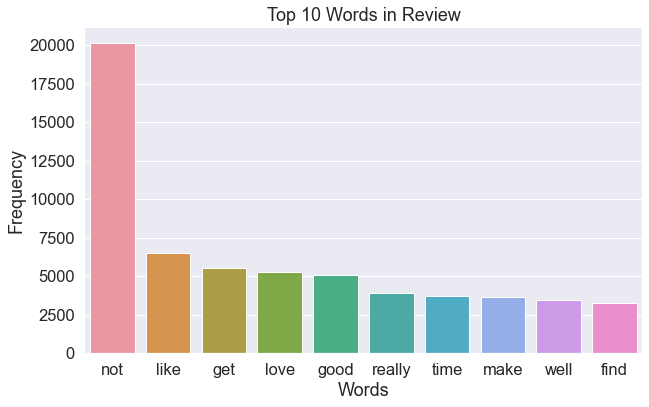

In [41]:
#Plot top 10 most frequent words

# Concatenate all reviews into a single string
review = ' '.join(list(data['clean_review']))

# Tokenize the text 
tokens = nltk.word_tokenize(review)

# Calculate the frequency distribution of the tokens
freq_dist = nltk.FreqDist(tokens)

# Get the top 10 words with highest frequency
top_10_words = freq_dist.most_common(10)

# Create a bar chart using Seaborn
sns.set_style("darkgrid")
sns.set_palette("husl")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=[word for word, freq in top_10_words], y=[freq for word, freq in top_10_words], ax=ax)
ax.set_title("Top 10 Words in Review")
ax.set_xlabel("Words")
ax.set_ylabel("Frequency")
plt.show()

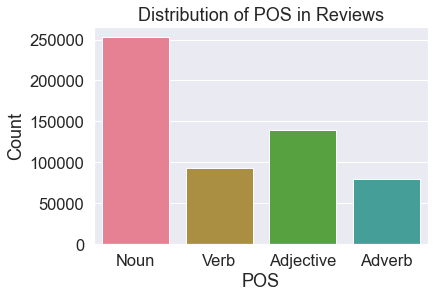

In [42]:
# Plot distribution of POS tags in reviews

pos_tags = nltk.pos_tag(tokens)

# Count the frequency of each POS tag
pos_freq = nltk.FreqDist(tag[1][0] for tag in pos_tags if tag[1][0] in wordnet_pos)

# Plot bar
sns.barplot(x=['Noun', 'Verb', 'Adjective', 'Adverb'], y=list(pos_freq.values()))
plt.title('Distribution of POS in Reviews')
plt.xlabel('POS')
plt.ylabel('Count')
plt.show()


Largest word count: 1083, Frequency: 1
Smallest word count: 1, Frequency: 7


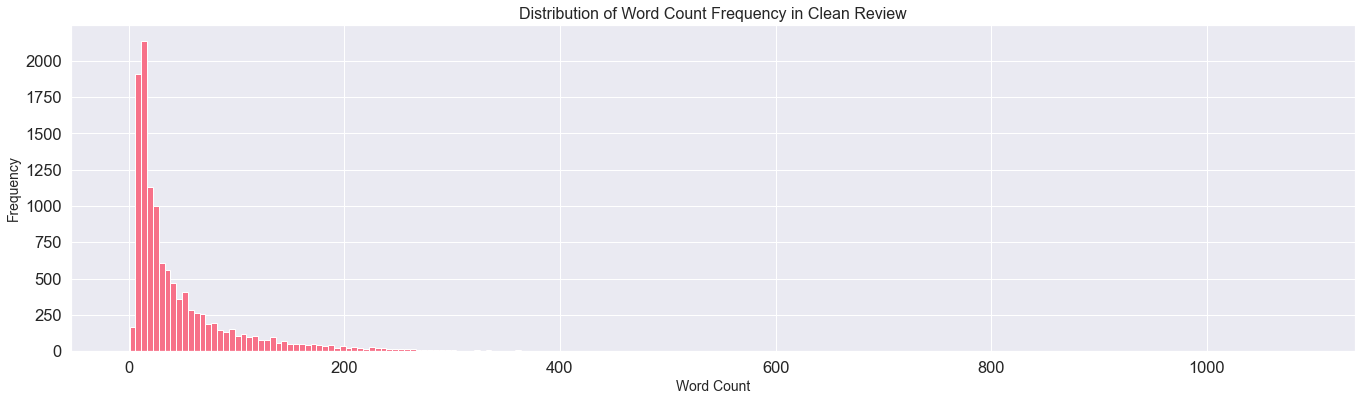

In [43]:
# Plot distirbution of word count frequency in review

# Calculate the word count for each review and add it as a new column
data['word_count'] = data['clean_review'].apply(lambda x: len(str(x).split()))

# Count the frequency of each word count
word_count_freq = data['word_count'].value_counts()

# Find the largest and smallest word counts
largest_word_count = data['word_count'].max()
smallest_word_count = data['word_count'].min()

# Get the corresponding frequencies
largest_word_count_freq = word_count_freq[largest_word_count]
smallest_word_count_freq = word_count_freq[smallest_word_count]

# Sort the word count frequencies by their index (i.e., the word count)
word_count_freq = word_count_freq.sort_index()

# Print the results
print('Largest word count: {}, Frequency: {}'.format(largest_word_count, largest_word_count_freq))
print('Smallest word count: {}, Frequency: {}'.format(smallest_word_count, smallest_word_count_freq))

# Plot a histogram of the word count frequencies
plt.figure(figsize=(23, 6))
plt.hist(data['word_count'], bins=200, density=False)
plt.title('Distribution of Word Count Frequency in Clean Review',fontsize=16)
plt.xlabel('Word Count',fontsize=14)
plt.ylabel('Frequency',fontsize=14)

# Set the y-axis limits to show all bars
plt.ylim(0, max(plt.gca().get_ylim()))
plt.show()

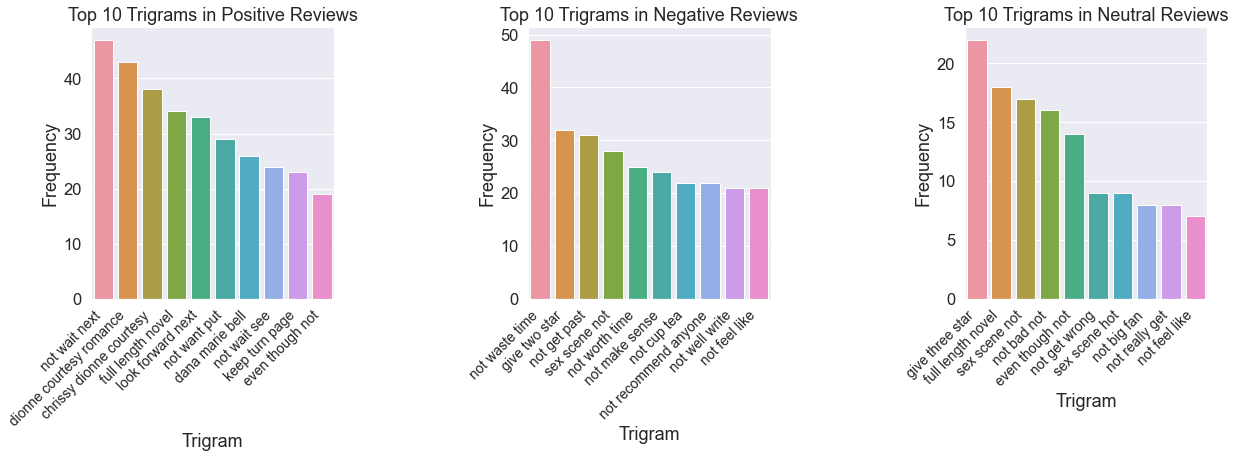

In [44]:
#Plot top 10 most frequent trigram for each sentiment class ( based on Rating sentiment)

# Divide the dataset into three separate datasets based on sentiment class
positive_reviews = data[data['rating_sentiment'] == 'Positive']
negative_reviews = data[data['rating_sentiment'] == 'Negative']
neutral_reviews = data[data['rating_sentiment'] == 'Neutral']

# Define a function to plot the top 10 trigrams for a given dataset
def plot_top_trigrams(dataset, title, ax):
    # Tokenize the text data and extract trigrams
    trigrams = ngrams(word_tokenize(dataset['clean_review'].sum()), 3)

    # Count the frequency of each trigram
    trigrams_freq = collections.Counter(trigrams)

    # Select the top 10 most common trigrams
    top_trigrams = trigrams_freq.most_common(10)

    # Separate the trigrams and their frequencies
    trigrams = [' '.join(t) for t, count in top_trigrams]
    frequencies = [count for t, count in top_trigrams]

    # Create a bar plot of the frequencies using Seaborn
    sns.barplot(x=trigrams, y=frequencies, ax=ax)

    # Add labels and a title to the plot
    ax.set(xlabel='Trigram', ylabel='Frequency', title=title)

    # Rotate the x-axis labels for readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=14)

# Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot the top 10 trigrams for each sentiment class
plot_top_trigrams(positive_reviews, 'Top 10 Trigrams in Positive Reviews', axs[0])
plot_top_trigrams(negative_reviews, 'Top 10 Trigrams in Negative Reviews', axs[1])
plot_top_trigrams(neutral_reviews, 'Top 10 Trigrams in Neutral Reviews', axs[2])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.8)

# Show the plots
plt.show()

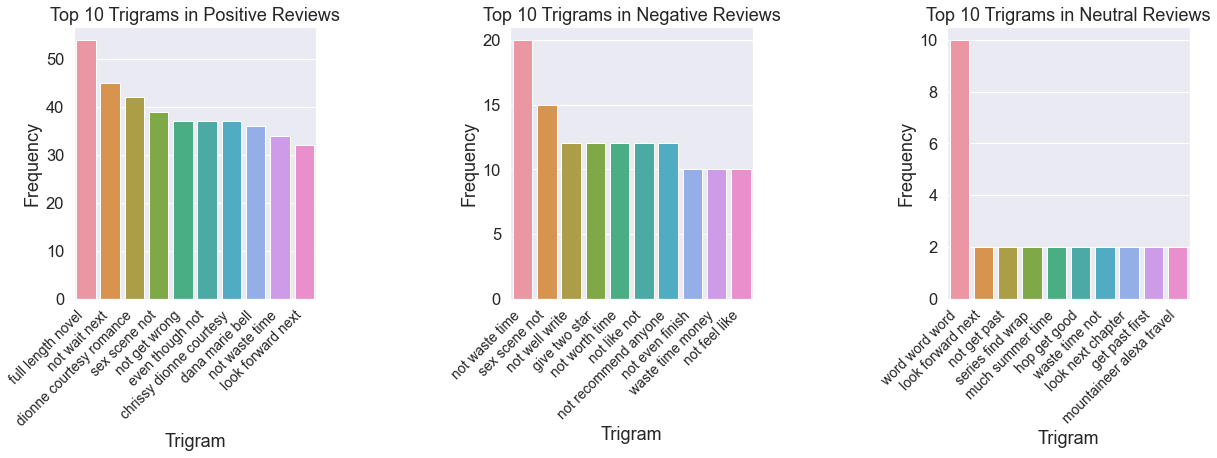

In [45]:
#Plot top 10 most frequent trigram for each sentiment class (based on VADER sentiment)

# Divide the dataset into three separate datasets based on sentiment class
positive_reviews = data[data['vader_sentiment'] == 'Positive']
negative_reviews = data[data['vader_sentiment'] == 'Negative']
neutral_reviews = data[data['vader_sentiment'] == 'Neutral']

# Define a function to plot the top 10 trigrams for a given dataset
def plot_top_trigrams(dataset, title, ax):
    # Tokenize the text data and extract trigrams
    trigrams = ngrams(word_tokenize(dataset['clean_review'].sum()), 3)

    # Count the frequency of each trigram
    trigrams_freq = collections.Counter(trigrams)

    # Select the top 10 most common trigrams
    top_trigrams = trigrams_freq.most_common(10)

    # Separate the trigrams and their frequencies
    trigrams = [' '.join(t) for t, count in top_trigrams]
    frequencies = [count for t, count in top_trigrams]

    # Create a bar plot of the frequencies using Seaborn
    sns.barplot(x=trigrams, y=frequencies, ax=ax)

    # Add labels and a title to the plot
    ax.set(xlabel='Trigram', ylabel='Frequency', title=title)

    # Rotate the x-axis labels for readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=14)

# Create a figure with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot the top 10 trigrams for each sentiment class
plot_top_trigrams(positive_reviews, 'Top 10 Trigrams in Positive Reviews', axs[0])
plot_top_trigrams(negative_reviews, 'Top 10 Trigrams in Negative Reviews', axs[1])
plot_top_trigrams(neutral_reviews, 'Top 10 Trigrams in Neutral Reviews', axs[2])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.8)

# Show the plots
plt.show()

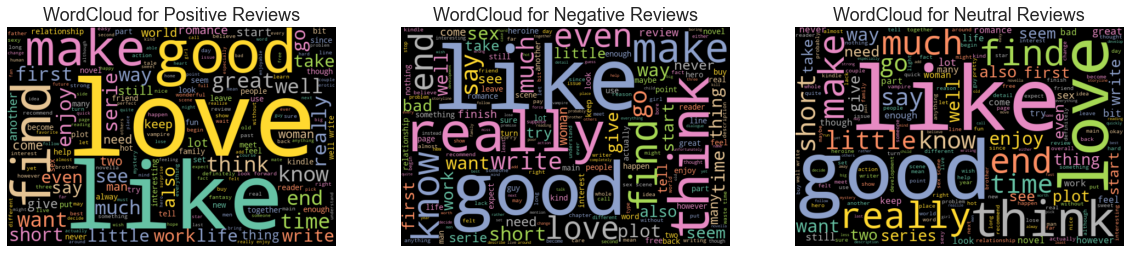

In [46]:
# Wordcloud on each sentiment class based on sentiment labelled by ratings

# Separate reviews by sentiment class
pos_tokens_r = data[data['rating_sentiment'] == 'Positive']['clean_review'].apply(lambda x: word_tokenize(x))
neg_tokens_r = data[data['rating_sentiment'] == 'Negative']['clean_review'].apply(lambda x: word_tokenize(x))
neu_tokens_r = data[data['rating_sentiment'] == 'Neutral']['clean_review'].apply(lambda x: word_tokenize(x))

# Flatten the token lists
pos_r = [item for sublist in pos_tokens_r for item in sublist]
neg_r = [item for sublist in neg_tokens_r for item in sublist]
neu_r = [item for sublist in neu_tokens_r for item in sublist]

# Define stopwords
stop_words = ["not","get"] + list(my_sw)

# Create word clouds for each sentiment class
pos_wc_r = WordCloud(width=600, height=400, stopwords = stop_words, background_color='black', colormap='Set2').generate(' '.join(pos_r))
neg_wc_r = WordCloud(width=600, height=400, stopwords = stop_words, background_color='black', colormap='Set2').generate(' '.join(neg_r))
neu_wc_r = WordCloud(width=600, height=400, stopwords = stop_words, background_color='black', colormap='Set2').generate(' '.join(neu_r))

# Plot the word clouds
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].imshow(pos_wc_r, interpolation='bilinear')
axs[0].set_title('WordCloud for Positive Reviews')
axs[0].axis('off')

axs[1].imshow(neg_wc_r, interpolation='bilinear')
axs[1].set_title('WordCloud for Negative Reviews')
axs[1].axis('off')

axs[2].imshow(neu_wc_r, interpolation='bilinear')
axs[2].set_title('WordCloud for Neutral Reviews')
axs[2].axis('off')

plt.show()

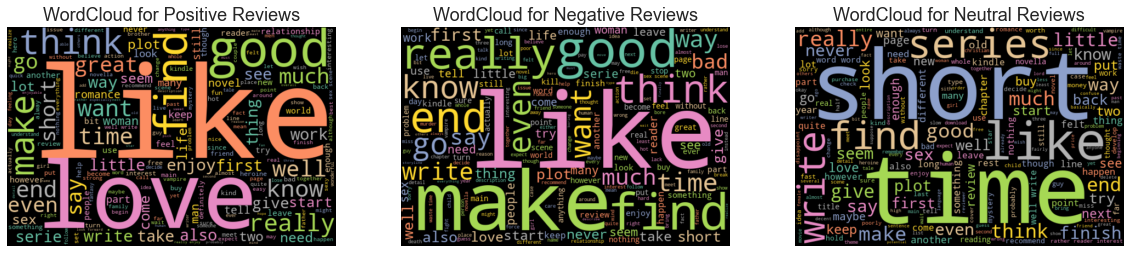

In [47]:
# Wordcloud on each sentiment class based on sentiment labelled by VADER

# Separate reviews by sentiment class
positive_tokens_v = data[data['vader_sentiment'] == 'Positive']['clean_review'].apply(lambda x: word_tokenize(x))
negative_tokens_v = data[data['vader_sentiment'] == 'Negative']['clean_review'].apply(lambda x: word_tokenize(x))
neutral_tokens_v = data[data['vader_sentiment'] == 'Neutral']['clean_review'].apply(lambda x: word_tokenize(x))

# Flatten the token lists
pos_v = [item for sublist in positive_tokens_v for item in sublist]
neg_v = [item for sublist in negative_tokens_v for item in sublist]
neu_v = [item for sublist in neutral_tokens_v for item in sublist]

# Define stopwords
stop_words = ["not","get"] + list(my_sw)

# Create word clouds for each sentiment class
pos_wc_v = WordCloud(width=600, height=400, stopwords = stop_words, background_color='black', colormap='Set2').generate(' '.join(pos_v))
neg_wc_v = WordCloud(width=600, height=400, stopwords = stop_words, background_color='black', colormap='Set2').generate(' '.join(neg_v))
neu_wc_v = WordCloud(width=600, height=400, stopwords = stop_words, background_color='black', colormap='Set2').generate(' '.join(neu_v))

# Plot the word clouds
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].imshow(pos_wc_v, interpolation='bilinear')
axs[0].set_title('WordCloud for Positive Reviews')
axs[0].axis('off')

axs[1].imshow(neg_wc_v, interpolation='bilinear')
axs[1].set_title('WordCloud for Negative Reviews')
axs[1].axis('off')

axs[2].imshow(neu_wc_v, interpolation='bilinear')
axs[2].set_title('WordCloud for Neutral Reviews')
axs[2].axis('off')
plt.show()

# SPLITTING INTO TRAINING & TESTING SETS - RATINGS Data

In [48]:
# Data split
X = data['clean_review']
y_rating = data['rating_sentiment']

X_train, X_test, y_rating_train, y_rating_test = train_test_split(X, y_rating, test_size=0.3, random_state=1)

# SPLITTING INTO TRAINING & TESTING SETS - VADER DATA

In [49]:
# Data split
X
y_vader = data['vader_sentiment']

X_train, X_test, y_vader_train, y_vader_test = train_test_split(X, y_vader, test_size=0.3, random_state=1)

# FEATURE EXTRACTION  - TF-IDF VECTORIZATION 

In [50]:
# Apply TfidfVectorizer 
tfidf = TfidfVectorizer()

# Transform the training and testing data into TF-IDF vectors
X_train =tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [51]:
# Print shape
print("X train shape:", X_train.shape)
print("Y rating train shape:", y_rating_train.shape)
print("Y rating test shape:", y_vader_train.shape)
print("X test shape:", X_test.shape)
print("Y vader train shape:", y_rating_test.shape)
print("Y vader test shape:", y_vader_test.shape)

X train shape: (8400, 20697)
Y rating train shape: (8400,)
Y rating test shape: (8400,)
X test shape: (3600, 20697)
Y vader train shape: (3600,)
Y vader test shape: (3600,)


# MODELLING - on RATINGS DATA

## MNB Classifier 

Accuracy of MNB_rating_Classifier: 0.6780555555555555
Classification Report:
               precision    recall  f1-score   support

    Negative       0.82      0.54      0.65      1184
     Neutral       0.00      0.00      0.00       591
    Positive       0.64      0.99      0.77      1825

    accuracy                           0.68      3600
   macro avg       0.49      0.51      0.48      3600
weighted avg       0.59      0.68      0.61      3600



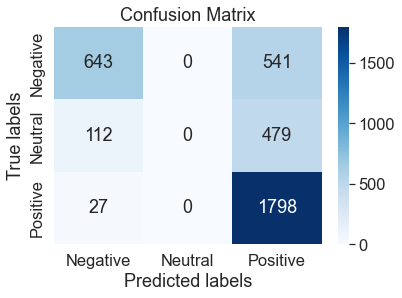

In [52]:
MNB_rating_classifier = MultinomialNB()
MNB_rating_clf = MNB_rating_classifier.fit(X_train, y_rating_train)

# make predictions on the test data
predicted_MNB_rating = MNB_rating_clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_rating_test, predicted_MNB_rating)

# Set labels for the confusion matrix
labels = ['Negative', 'Neutral', 'Positive']

# Create the plot using Seaborn's heatmap
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set title and axis labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

# Print accuracy and classification report
print("Accuracy of MNB_rating_Classifier:", metrics.accuracy_score(y_rating_test, predicted_MNB_rating))
print("Classification Report:\n", metrics.classification_report(y_rating_test, predicted_MNB_rating))

# Display the confusion matrix
plt.show()

## SVC Classifier 

Accuracy of SVC_rating_Classifier: 0.7480555555555556
Classification Report:
               precision    recall  f1-score   support

    Negative       0.75      0.81      0.78      1184
     Neutral       0.53      0.09      0.16       591
    Positive       0.76      0.92      0.83      1825

    accuracy                           0.75      3600
   macro avg       0.68      0.61      0.59      3600
weighted avg       0.72      0.75      0.70      3600



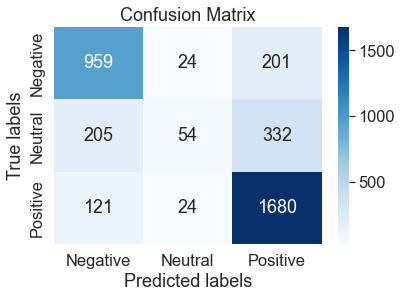

In [53]:
SVC_rating_classifier = SVC()
SVC_rating_clf = SVC_rating_classifier.fit(X_train, y_rating_train)

# make predictions on the test data
predicted_SVC_rating = SVC_rating_clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_rating_test, predicted_SVC_rating)

# Set labels for the confusion matrix
labels = ['Negative', 'Neutral', 'Positive']

# Create the plot using Seaborn's heatmap
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set title and axis labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

# Print accuracy and classification report
print("Accuracy of SVC_rating_Classifier:", metrics.accuracy_score(y_rating_test, predicted_SVC_rating))
print("Classification Report:\n", metrics.classification_report(y_rating_test, predicted_SVC_rating))

# Display the confusion matrix
plt.show()

## LinearSVC Classifier

Accuracy of LSVC_rating_Classifier: 0.7369444444444444
Classification Report:
               precision    recall  f1-score   support

    Negative       0.74      0.78      0.76      1184
     Neutral       0.40      0.21      0.28       591
    Positive       0.78      0.88      0.83      1825

    accuracy                           0.74      3600
   macro avg       0.64      0.62      0.62      3600
weighted avg       0.71      0.74      0.72      3600



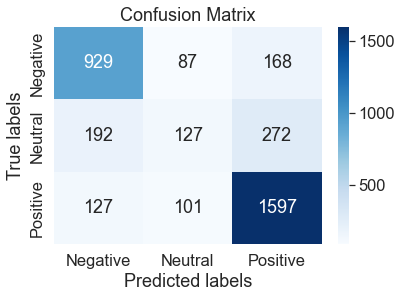

In [54]:
LSVC_rating_classifier = LinearSVC()
LSVC_rating_clf = LSVC_rating_classifier.fit(X_train, y_rating_train)

# make predictions on the test data
predicted_LSVC_rating = LSVC_rating_clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_rating_test, predicted_LSVC_rating)

# Set labels for the confusion matrix
labels = ['Negative', 'Neutral', 'Positive']

# Create the plot using Seaborn's heatmap
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set title and axis labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

# Print accuracy and classification report
print("Accuracy of LSVC_rating_Classifier:", metrics.accuracy_score(y_rating_test, predicted_LSVC_rating))
print("Classification Report:\n", metrics.classification_report(y_rating_test, predicted_LSVC_rating))

# Display the confusion matrix
plt.show()

# MODELLING - on VADER DATA

## MNB Classifier (VADER)

Accuracy of MNB_vader_Classifier: 0.7775
Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       717
     Neutral       0.00      0.00      0.00        84
    Positive       0.78      1.00      0.87      2799

    accuracy                           0.78      3600
   macro avg       0.26      0.33      0.29      3600
weighted avg       0.60      0.78      0.68      3600



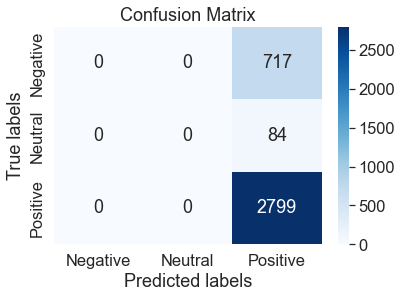

In [55]:
MNB_vader_classifier = MultinomialNB()
MNB_vader_clf = MNB_vader_classifier.fit(X_train, y_vader_train)

# make predictions on the test data
predicted_MNB_Vader = MNB_vader_clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_vader_test, predicted_MNB_Vader)

# Set labels for the confusion matrix
labels = ['Negative', 'Neutral', 'Positive']

# Create the plot using Seaborn's heatmap
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set title and axis labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

# Print accuracy and classification report
print("Accuracy of MNB_vader_Classifier:", metrics.accuracy_score(y_vader_test, predicted_MNB_Vader))
print("Classification Report:\n", classification_report(y_vader_test, predicted_MNB_Vader))

# Display the confusion matrix
plt.show()

## SVC Classifier (VADER)

Accuracy of SVC_vader_Classifier: 0.8122222222222222
Classification Report:
               precision    recall  f1-score   support

    Negative       0.73      0.25      0.38       717
     Neutral       0.00      0.00      0.00        84
    Positive       0.82      0.98      0.89      2799

    accuracy                           0.81      3600
   macro avg       0.51      0.41      0.42      3600
weighted avg       0.78      0.81      0.77      3600



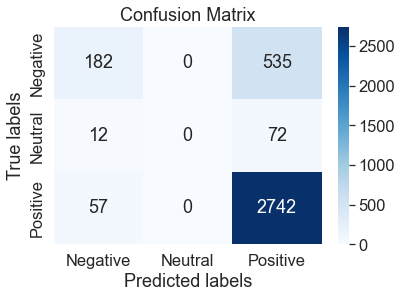

In [56]:
SVC_vader_classifier = SVC()
SVC_vader_clf = SVC_vader_classifier.fit(X_train, y_vader_train)

# make predictions on the test data
predicted_SVC_Vader = SVC_vader_clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_vader_test, predicted_SVC_Vader)

# Set labels for the confusion matrix
labels = ['Negative', 'Neutral', 'Positive']

# Create the plot using Seaborn's heatmap
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set title and axis labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

# Print accuracy and classification report
print("Accuracy of SVC_vader_Classifier:", metrics.accuracy_score(y_vader_test, predicted_SVC_Vader))
print("Classification Report:\n", metrics.classification_report(y_vader_test, predicted_SVC_Vader))

# Display the confusion matrix
plt.show()

## LinearSVC Classifier (VADER)

Accuracy of LSVC_vader_Classifier: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

    Negative       0.64      0.55      0.59       717
     Neutral       0.50      0.02      0.05        84
    Positive       0.87      0.93      0.90      2799

    accuracy                           0.83      3600
   macro avg       0.67      0.50      0.51      3600
weighted avg       0.82      0.83      0.82      3600



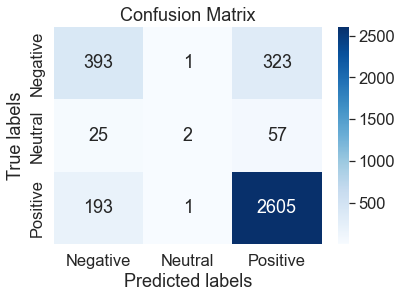

In [57]:
LSVC_vader_classifier = LinearSVC()
LSVC_vader_clf = LSVC_vader_classifier.fit(X_train, y_vader_train)

# make predictions on the test data
predicted_LSVC_Vader = LSVC_vader_clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_vader_test, predicted_LSVC_Vader)

# Set labels for the confusion matrix
labels = ['Negative', 'Neutral', 'Positive']

# Create the plot using Seaborn's heatmap
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set title and axis labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

# Print accuracy and classification report
print("Accuracy of LSVC_vader_Classifier:", metrics.accuracy_score(y_vader_test, predicted_LSVC_Vader))
print("Classification Report:\n", metrics.classification_report(y_vader_test, predicted_LSVC_Vader))

# Display the confusion matrix
plt.show()

## SMOTE IMPLEMENTATION on RATINGS DATA

In [58]:
# Display count of data in y train set
Counter(y_rating_train)

Counter({'Negative': 2816, 'Neutral': 1409, 'Positive': 4175})

In [59]:
# Transform Dataset
sampling_strategy = {'Negative': 4175, 'Neutral': 4175, 'Positive': 4175}
oversample_rating = SMOTE(sampling_strategy = sampling_strategy, k_neighbors = 5, random_state = 1)
# To prevent overwriting
X_train_smote, y_rating_train_smote = oversample_rating.fit_resample(X_train, y_rating_train)

In [60]:
# Display count of data in y train set (after smote)
Counter(y_rating_train_smote)

Counter({'Negative': 4175, 'Neutral': 4175, 'Positive': 4175})

In [61]:
# Print shape
print(X_train_smote.shape)
print(y_rating_train_smote.shape)

(12525, 20697)
(12525,)


### MNB Classifier (Ratings + SMOTE)

Accuracy of MNB_rating_smote_classifier: 0.6647222222222222
Classification Report:
               precision    recall  f1-score   support

    Negative       0.76      0.71      0.73      1184
     Neutral       0.30      0.54      0.38       591
    Positive       0.86      0.68      0.76      1825

    accuracy                           0.66      3600
   macro avg       0.64      0.64      0.63      3600
weighted avg       0.74      0.66      0.69      3600



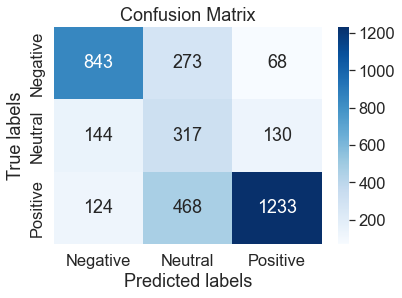

In [62]:
MNB_rating_smote_classifier = MultinomialNB()
MNB_rating_smote_clf = MNB_rating_smote_classifier.fit(X_train_smote, y_rating_train_smote)

# make predictions on the test data
predicted_MNB_rating_smote = MNB_rating_smote_clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_rating_test, predicted_MNB_rating_smote)

# Set labels for the confusion matrix
labels = ['Negative', 'Neutral', 'Positive']

# Create the plot using Seaborn's heatmap
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set title and axis labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

# Print accuracy and classification report
print("Accuracy of MNB_rating_smote_classifier:", metrics.accuracy_score(y_rating_test, predicted_MNB_rating_smote))
print("Classification Report:\n", metrics.classification_report(y_rating_test, predicted_MNB_rating_smote))

# Display the confusion matrix
plt.show()

### SVC Classifier (Ratings + SMOTE)

Accuracy of SVC_rating_smote_classifier: 0.7497222222222222
Classification Report:
               precision    recall  f1-score   support

    Negative       0.76      0.79      0.78      1184
     Neutral       0.50      0.15      0.23       591
    Positive       0.76      0.92      0.83      1825

    accuracy                           0.75      3600
   macro avg       0.67      0.62      0.61      3600
weighted avg       0.72      0.75      0.72      3600



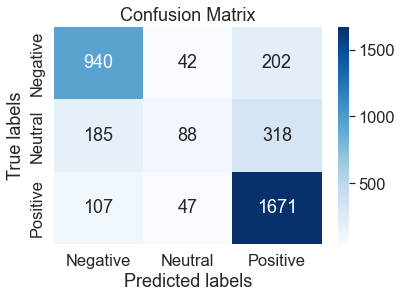

In [63]:
SVC_rating_smote_classifier = SVC()
SVC_rating_smote_clf = SVC_rating_smote_classifier.fit(X_train_smote, y_rating_train_smote)

# make predictions on the test data
predicted_SVC_rating_smote = SVC_rating_smote_clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_rating_test, predicted_SVC_rating_smote)

# Set labels for the confusion matrix
labels = ['Negative', 'Neutral', 'Positive']

# Create the plot using Seaborn's heatmap
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set title and axis labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

# Print accuracy and classification report
print("Accuracy of SVC_rating_smote_classifier:", metrics.accuracy_score(y_rating_test, predicted_SVC_rating_smote))
print("Classification Report:\n", metrics.classification_report(y_rating_test, predicted_SVC_rating_smote))

# Display the confusion matrix
plt.show()

### LinearSVC  Classifier (Ratings + SMOTE)

Accuracy of LSVC_rating_smote_classifier: 0.7008333333333333
Classification Report:
               precision    recall  f1-score   support

    Negative       0.74      0.74      0.74      1184
     Neutral       0.32      0.32      0.32       591
    Positive       0.80      0.80      0.80      1825

    accuracy                           0.70      3600
   macro avg       0.62      0.62      0.62      3600
weighted avg       0.70      0.70      0.70      3600



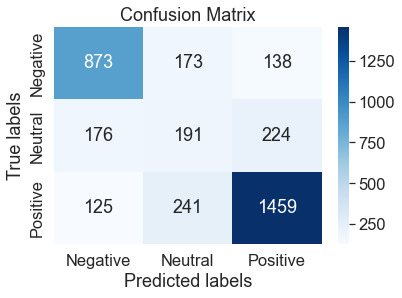

In [64]:
LSVC_rating_smote_classifier = LinearSVC()
LSVC_rating_smote_clf = LSVC_rating_smote_classifier.fit(X_train_smote, y_rating_train_smote)

# make predictions on the test data
predicted_LSVC_rating_smote = LSVC_rating_smote_clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_rating_test, predicted_LSVC_rating_smote)

# Set labels for the confusion matrix
labels = ['Negative', 'Neutral', 'Positive']

# Create the plot using Seaborn's heatmap
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set title and axis labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

# Print accuracy and classification report
print("Accuracy of LSVC_rating_smote_classifier:", metrics.accuracy_score(y_rating_test, predicted_LSVC_rating_smote))
print("Classification Report:\n", metrics.classification_report(y_rating_test, predicted_LSVC_rating_smote))

# Display the confusion matrix
plt.show()

## SMOTE IMPLEMENTATION on VADER DATA

In [65]:
# Display count of data in y train set
Counter(y_vader_train)

Counter({'Negative': 1715, 'Positive': 6487, 'Neutral': 198})

In [66]:
# Transform Dataset
oversample_vader = SMOTE(sampling_strategy =  {'Negative': 6487, 'Neutral': 6487, 'Positive': 6487}, k_neighbors = 5, random_state = 1)
# To prevent overwriting
X_train_smote, y_vader_train_smote = oversample_vader.fit_resample(X_train, y_vader_train)

In [67]:
# Display count of data in y train set (after smote)
Counter(y_vader_train_smote)

Counter({'Negative': 6487, 'Positive': 6487, 'Neutral': 6487})

In [68]:
# Print shape
print(X_train_smote.shape)
print(y_vader_train_smote.shape)

(19461, 20697)
(19461,)


### MNB Classifier (VADER + SMOTE)

Accuracy of MNB_vader_smote_classifier: 0.7386111111111111
Classification Report:
               precision    recall  f1-score   support

    Negative       0.46      0.68      0.55       717
     Neutral       0.11      0.20      0.14        84
    Positive       0.90      0.77      0.83      2799

    accuracy                           0.74      3600
   macro avg       0.49      0.55      0.51      3600
weighted avg       0.80      0.74      0.76      3600



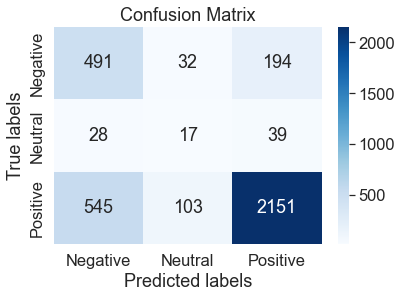

In [69]:
MNB_vader_smote_classifier = MultinomialNB()
MNB_vader_smote_clf = MNB_vader_smote_classifier.fit(X_train_smote, y_vader_train_smote)

# make predictions on the test data
predicted_MNB_vader_smote = MNB_vader_smote_clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_vader_test, predicted_MNB_vader_smote)

# Set labels for the confusion matrix
labels = ['Negative', 'Neutral', 'Positive']

# Create the plot using Seaborn's heatmap
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set title and axis labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

# Print accuracy and classification report
print("Accuracy of MNB_vader_smote_classifier:", metrics.accuracy_score(y_vader_test, predicted_MNB_vader_smote))
print("Classification Report:\n", metrics.classification_report(y_vader_test, predicted_MNB_vader_smote))

# Display the confusion matrix
plt.show()

### SVC Classifier (VADER + SMOTE)

Accuracy of SVC_vader_smote_classifier: 0.8155555555555556
Classification Report:
               precision    recall  f1-score   support

    Negative       0.72      0.28      0.41       717
     Neutral       1.00      0.01      0.02        84
    Positive       0.82      0.98      0.89      2799

    accuracy                           0.82      3600
   macro avg       0.85      0.42      0.44      3600
weighted avg       0.81      0.82      0.78      3600



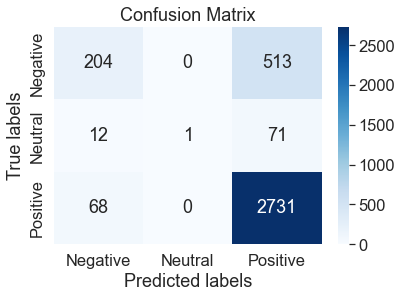

In [70]:
SVC_vader_smote_classifier = SVC()
SVC_vader_smote_clf = SVC_vader_smote_classifier.fit(X_train_smote, y_vader_train_smote)

# make predictions on the test data
predicted_SVC_vader_smote = SVC_vader_smote_clf.predict(X_test)

#Confusion matrix
cm = confusion_matrix(y_vader_test, predicted_SVC_vader_smote)

# Set labels for the confusion matrix
labels = ['Negative', 'Neutral', 'Positive']

# Create the plot using Seaborn's heatmap
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set title and axis labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

#Print accuracy and classification report
print("Accuracy of SVC_vader_smote_classifier:", metrics.accuracy_score(y_vader_test, predicted_SVC_vader_smote))
print("Classification Report:\n", metrics.classification_report(y_vader_test, predicted_SVC_vader_smote))

# Display the confusion matrix
plt.show()

### LinearSVC  Classifier (VADER + SMOTE)

Accuracy of LSVC_vader_smote_classifier: 0.8102777777777778
Classification Report:
               precision    recall  f1-score   support

    Negative       0.56      0.63      0.60       717
     Neutral       0.19      0.12      0.15        84
    Positive       0.89      0.88      0.89      2799

    accuracy                           0.81      3600
   macro avg       0.55      0.54      0.54      3600
weighted avg       0.81      0.81      0.81      3600



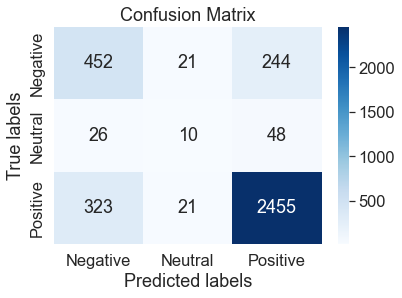

In [71]:
LSVC_vader_smote_classifier = LinearSVC()
LSVC_vader_smote_clf = LSVC_vader_smote_classifier.fit(X_train_smote, y_vader_train_smote)

# make predictions on the test data
predicted_LSVC_vader_smote = LSVC_vader_smote_clf.predict(X_test)

#Confusion matrix
cm = confusion_matrix(y_vader_test, predicted_LSVC_vader_smote)

# Set labels for the confusion matrix
labels = ['Negative', 'Neutral', 'Positive']

# Create the plot using Seaborn's heatmap
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set title and axis labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

# Print accuracy and classification report
print("Accuracy of LSVC_vader_smote_classifier:", metrics.accuracy_score(y_vader_test, predicted_LSVC_vader_smote))
print("Classification Report:\n", metrics.classification_report(y_vader_test, predicted_LSVC_vader_smote))

# Display the confusion matrix
plt.show()

### MODEL COMPARISON

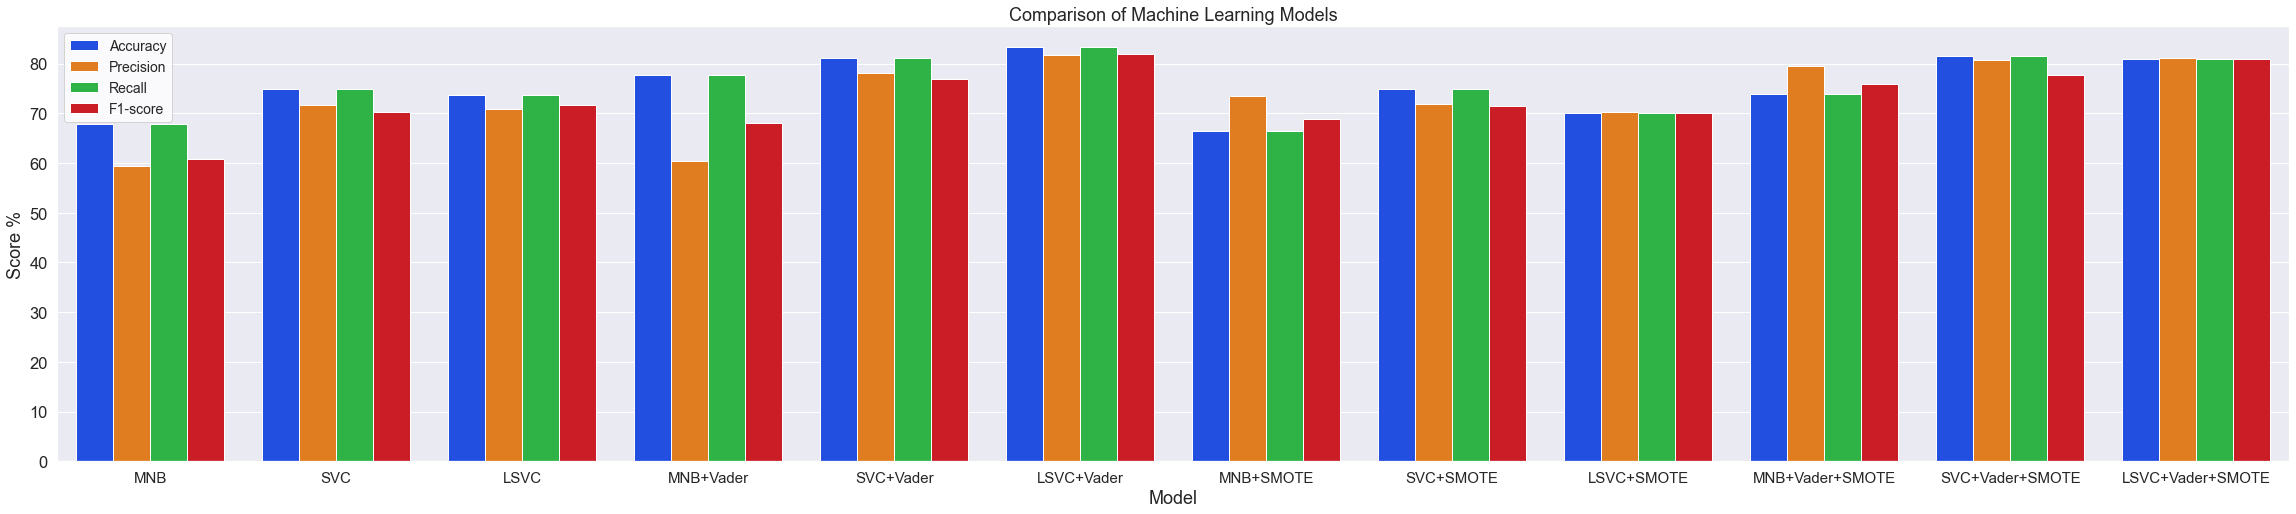

In [72]:
#Plot graph for overall model comparison by metrics

# Classification report
MNB_rating_cr = classification_report(y_rating_test, predicted_MNB_rating, output_dict = True)
SVC_rating_cr = classification_report(y_rating_test, predicted_SVC_rating, output_dict = True)
LSVC_rating_cr = classification_report(y_rating_test, predicted_LSVC_rating, output_dict = True)
MNB_Vader_cr = classification_report(y_vader_test, predicted_MNB_Vader, output_dict = True)
SVC_Vader_cr = classification_report(y_vader_test, predicted_SVC_Vader, output_dict = True)
LSVC_Vader_cr = classification_report(y_vader_test, predicted_LSVC_Vader, output_dict = True)
MNB_rating_smote_cr = classification_report(y_rating_test, predicted_MNB_rating_smote, output_dict = True)
SVC_rating_smote_cr = classification_report(y_rating_test, predicted_SVC_rating_smote, output_dict = True)
LSVC_rating_smote_cr = classification_report(y_rating_test, predicted_LSVC_rating_smote, output_dict = True)
MNB_vader_smote_cr = classification_report(y_vader_test, predicted_MNB_vader_smote, output_dict = True)
SVC_vader_smote_cr = classification_report(y_vader_test, predicted_SVC_vader_smote, output_dict = True)
LSVC_vader_smote_cr = classification_report(y_vader_test, predicted_LSVC_vader_smote, output_dict = True)

# Extract the metrics from the report
metrics = ['accuracy', 'precision', 'recall', 'f1-score']
MNB_rating_metrics = [MNB_rating_cr['accuracy'], MNB_rating_cr['weighted avg']['precision'], MNB_rating_cr['weighted avg']['recall'], MNB_rating_cr['weighted avg']['f1-score']]
SVC_rating_metrics = [SVC_rating_cr['accuracy'], SVC_rating_cr['weighted avg']['precision'], SVC_rating_cr['weighted avg']['recall'], SVC_rating_cr['weighted avg']['f1-score']]
LSVC_rating_metrics = [LSVC_rating_cr['accuracy'], LSVC_rating_cr['weighted avg']['precision'], LSVC_rating_cr['weighted avg']['recall'], LSVC_rating_cr['weighted avg']['f1-score']]
MNB_vader_metrics = [MNB_Vader_cr['accuracy'], MNB_Vader_cr['weighted avg']['precision'], MNB_Vader_cr['weighted avg']['recall'], MNB_Vader_cr['weighted avg']['f1-score']]
SVC_vader_metrics = [SVC_Vader_cr['accuracy'], SVC_Vader_cr['weighted avg']['precision'], SVC_Vader_cr['weighted avg']['recall'], SVC_Vader_cr['weighted avg']['f1-score']]
LSVC_vader_metrics = [LSVC_Vader_cr['accuracy'], LSVC_Vader_cr['weighted avg']['precision'], LSVC_Vader_cr['weighted avg']['recall'], LSVC_Vader_cr['weighted avg']['f1-score']]
MNB_SMOTE_rating_metrics = [MNB_rating_smote_cr['accuracy'], MNB_rating_smote_cr['weighted avg']['precision'], MNB_rating_smote_cr['weighted avg']['recall'], MNB_rating_smote_cr['weighted avg']['f1-score']]
SVC_SMOTE_rating_metrics = [SVC_rating_smote_cr['accuracy'], SVC_rating_smote_cr['weighted avg']['precision'], SVC_rating_smote_cr['weighted avg']['recall'], SVC_rating_smote_cr['weighted avg']['f1-score']]
LSVC_SMOTE_rating_metrics = [LSVC_rating_smote_cr['accuracy'], LSVC_rating_smote_cr['weighted avg']['precision'], LSVC_rating_smote_cr['weighted avg']['recall'], LSVC_rating_smote_cr['weighted avg']['f1-score']]
MNB_SMOTE_vader_metrics = [MNB_vader_smote_cr['accuracy'], MNB_vader_smote_cr['weighted avg']['precision'], MNB_vader_smote_cr['weighted avg']['recall'], MNB_vader_smote_cr['weighted avg']['f1-score']]
SVC_SMOTE_vader_metrics = [SVC_vader_smote_cr['accuracy'], SVC_vader_smote_cr['weighted avg']['precision'], SVC_vader_smote_cr['weighted avg']['recall'], SVC_vader_smote_cr['weighted avg']['f1-score']]
LSVC_SMOTE_vader_metrics = [LSVC_vader_smote_cr['accuracy'], LSVC_vader_smote_cr['weighted avg']['precision'], LSVC_vader_smote_cr['weighted avg']['recall'], LSVC_vader_smote_cr['weighted avg']['f1-score']]

# Convert values to percentage format
MNB_rating_value = [f"{value*100:.2f}" for value in MNB_rating_metrics]
SVC_rating_value = [f"{value*100:.2f}" for value in SVC_rating_metrics]
LSVC_rating_value = [f"{value*100:.2f}" for value in LSVC_rating_metrics]
MNB_vader_value = [f"{value*100:.2f}" for value in MNB_vader_metrics]
SVC_vader_value = [f"{value*100:.2f}" for value in SVC_vader_metrics]
LSVC_vader_value = [f"{value*100:.2f}" for value in LSVC_vader_metrics]
MNB_SMOTE_rating_value = [f"{value*100:.2f}" for value in MNB_SMOTE_rating_metrics]
SVC_SMOTE_rating_value = [f"{value*100:.2f}" for value in SVC_SMOTE_rating_metrics]
LSVC_SMOTE_rating_value = [f"{value*100:.2f}" for value in LSVC_SMOTE_rating_metrics]
MNB_SMOTE_vader_value = [f"{value*100:.2f}" for value in MNB_SMOTE_vader_metrics]
SVC_SMOTE_vader_value = [f"{value*100:.2f}" for value in SVC_SMOTE_vader_metrics]
LSVC_SMOTE_vader_value = [f"{value*100:.2f}" for value in LSVC_SMOTE_vader_metrics]


# Create a dataframe with the values
data_metrics = {'Model': ['MNB', 'SVC', 'LSVC', 'MNB+Vader', 'SVC+Vader', 'LSVC+Vader', 'MNB+SMOTE', 'SVC+SMOTE', 'LSVC+SMOTE', 'MNB+Vader+SMOTE', 'SVC+Vader+SMOTE', 'LSVC+Vader+SMOTE'], 
        'Accuracy': [MNB_rating_value[0], SVC_rating_value[0], LSVC_rating_value[0], MNB_vader_value[0], SVC_vader_value[0], LSVC_vader_value[0], MNB_SMOTE_rating_value[0], SVC_SMOTE_rating_value[0], LSVC_SMOTE_rating_value[0], MNB_SMOTE_vader_value[0], SVC_SMOTE_vader_value[0], LSVC_SMOTE_vader_value[0]], 
        'Precision': [MNB_rating_value[1], SVC_rating_value[1], LSVC_rating_value[1], MNB_vader_value[1], SVC_vader_value[1], LSVC_vader_value[1], MNB_SMOTE_rating_value[1], SVC_SMOTE_rating_value[1], LSVC_SMOTE_rating_value[1], MNB_SMOTE_vader_value[1], SVC_SMOTE_vader_value[1], LSVC_SMOTE_vader_value[1]],
        'Recall': [MNB_rating_value[2], SVC_rating_value[2], LSVC_rating_value[2], MNB_vader_value[2], SVC_vader_value[2], LSVC_vader_value[2], MNB_SMOTE_rating_value[2], SVC_SMOTE_rating_value[2], LSVC_SMOTE_rating_value[2], MNB_SMOTE_vader_value[2], SVC_SMOTE_vader_value[2], LSVC_SMOTE_vader_value[2]], 
        'F1-score': [MNB_rating_value[3], SVC_rating_value[3], LSVC_rating_value[3], MNB_vader_value[3], SVC_vader_value[3], LSVC_vader_value[3], MNB_SMOTE_rating_value[3], SVC_SMOTE_rating_value[3], LSVC_SMOTE_rating_value[3], MNB_SMOTE_vader_value[3], SVC_SMOTE_vader_value[3], LSVC_SMOTE_vader_value[3]]}

df = pd.DataFrame(data_metrics)

# Melt the dataframe
df_melt = pd.melt(df, id_vars=['Model'], var_name='Metrics', value_name='Score %')
df_melt['Score %'] = df_melt['Score %'].astype(float)

# Create a bar plot using seaborn
fig, ax = plt.subplots(figsize=(40, 8))
sns.set(style='whitegrid')
sns.barplot(data=df_melt, x='Model', y='Score %', hue='Metrics', palette='bright')
plt.title('Comparison of Machine Learning Models',fontsize = 18)

# Set fontsize of xticks
plt.xticks(fontsize=15)

# Label x and y-xis. Show plot
plt.xlabel('Model', fontsize=18)
plt.ylabel('Score %', fontsize=18)
plt.legend(fontsize=14)
plt.show()


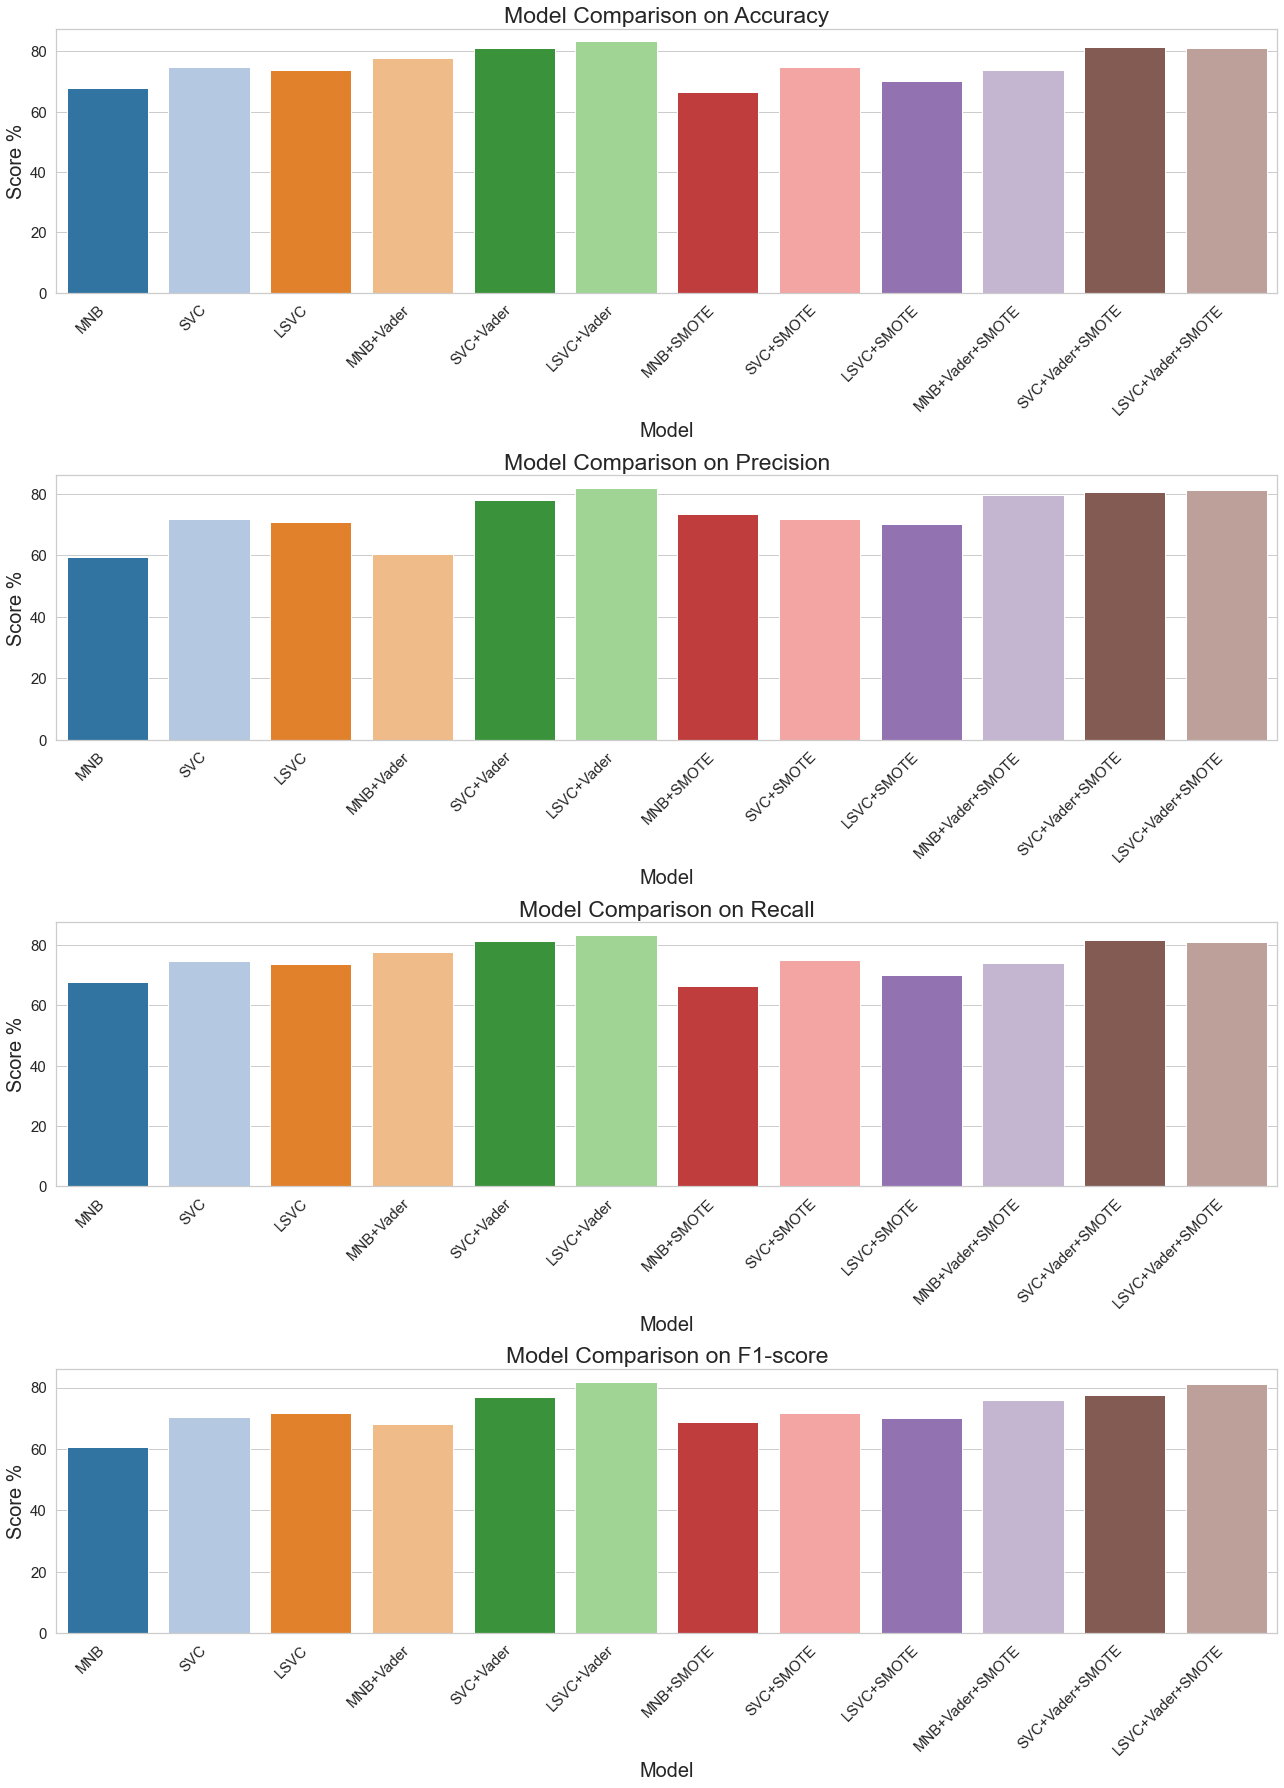

In [73]:
# Plot model comparison based on each metrices

# Set Seaborn palette
sns.set_palette("tab20")

# Create a new figure and axes for each plot
fig, axes = plt.subplots(4, 1, figsize=(18,25))

# Plot the accuracy data
sns.barplot(x="Model", y="Score %", data=df_melt[df_melt["Metrics"] == "Accuracy"], ax=axes[0])
axes[0].set_xlabel("Model",fontsize = 20)
axes[0].set_ylabel("Score %",fontsize = 20)
axes[0].tick_params(axis='both', which='major', labelsize=15)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right", fontsize=15)

# Plot the precision data
sns.barplot(x="Model", y="Score %", data=df_melt[df_melt["Metrics"] == "Precision"], ax=axes[1])
axes[1].set_xlabel("Model",fontsize = 20)
axes[1].set_ylabel("Score %",fontsize = 20)
axes[1].tick_params(axis='both', which='major', labelsize=15)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right", fontsize=15)

# Plot the recall data
sns.barplot(x="Model", y="Score %", data=df_melt[df_melt["Metrics"] == "Recall"], ax=axes[2])
axes[2].set_xlabel("Model",fontsize = 20)
axes[2].set_ylabel("Score %",fontsize = 20)
axes[2].tick_params(axis='both', which='major', labelsize=15)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha="right", fontsize=15)

# Plot the F1-score data
sns.barplot(x="Model", y="Score %", data=df_melt[df_melt["Metrics"] == "F1-score"], ax=axes[3])
axes[3].set_xlabel("Model",fontsize = 20)
axes[3].set_ylabel("Score %",fontsize = 20)
axes[3].tick_params(axis='both', which='major', labelsize=15)
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=45, ha="right", fontsize=15)

axes[0].set_title('Model Comparison on Accuracy',fontsize = 23)
axes[1].set_title('Model Comparison on Precision',fontsize = 23)
axes[2].set_title('Model Comparison on Recall',fontsize = 23)
axes[3].set_title('Model Comparison on F1-score',fontsize = 23)

# Adjust the spacing between the plots
plt.tight_layout()

# MODEL TUNING 

## LSVC + VADER 

Best parameters:  {'C': 1, 'dual': False, 'loss': 'squared_hinge', 'max_iter': 500, 'penalty': 'l1'}
Best score:  0.8317857142857144
Accuracy: 0.8391666666666666
Classification Report:
               precision    recall  f1-score   support

    Negative       0.66      0.57      0.61       717
     Neutral       0.00      0.00      0.00        84
    Positive       0.88      0.93      0.90      2799

    accuracy                           0.84      3600
   macro avg       0.51      0.50      0.51      3600
weighted avg       0.81      0.84      0.82      3600



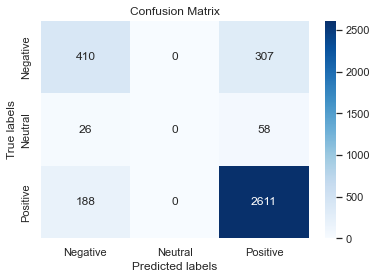

In [79]:
param_grid = {
    'C': [0.1, 0.5, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'loss' : ['hinge', 'squared_hinge'],
    'max_iter': [100, 500, 1000, 2000],
    'dual': [False, True]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(LSVC_vader_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_vader_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best score
print("Best parameters: ", best_params)
print("Best score: ", best_score)

# Apply the best parameters to the model
LSVC_v_tuned = LSVC_vader_classifier.set_params(**best_params)

# Fit the model to the training data
LSVC_v_tuned.fit(X_train, y_vader_train)

# Predict on the test data
pred_LSVC_vader_tuned = LSVC_v_tuned.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_vader_test, pred_LSVC_vader_tuned)

# Set labels for the confusion matrix
labels = ['Negative', 'Neutral', 'Positive']

# Create the plot using Seaborn's heatmap
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set title and axis labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

# Print accuracy and classification report
print("Accuracy:", metrics.accuracy_score(y_vader_test, pred_LSVC_vader_tuned))
print("Classification Report:\n", metrics.classification_report(y_vader_test, pred_LSVC_vader_tuned))

# Display the confusion matrix
plt.show()

## LSVC + VADER + SMOTE

Best parameters:  {'C': 10, 'dual': False, 'loss': 'squared_hinge', 'max_iter': 1000, 'penalty': 'l1'}
Best score:  0.9516476063580533
Accuracy: 0.7963888888888889
Classification Report:
               precision    recall  f1-score   support

    Negative       0.53      0.56      0.55       717
     Neutral       0.19      0.10      0.13        84
    Positive       0.88      0.88      0.88      2799

    accuracy                           0.80      3600
   macro avg       0.53      0.51      0.52      3600
weighted avg       0.79      0.80      0.79      3600



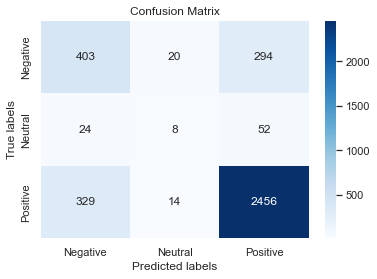

In [80]:
param_grid = {
    'C': [0.1, 0.5, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'loss' : ['hinge', 'squared_hinge'],
    'max_iter': [100, 500, 1000, 2000],
    'dual': [False, True]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(LSVC_vader_smote_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_smote, y_vader_train_smote)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best score
print("Best parameters: ", best_params)
print("Best score: ", best_score)

# Apply the best parameters to the model
LSVC_v_smote_tuned = LSVC_vader_smote_classifier.set_params(**best_params)

# Fit the model to the training data
LSVC_v_smote_tuned.fit(X_train_smote, y_vader_train_smote)

# Predict on the test data
pred_LSVC_v_smote_tuned = LSVC_v_smote_tuned.predict(X_test)

#Confusion matrix
cm = confusion_matrix(y_vader_test, pred_LSVC_v_smote_tuned)

# Set labels for the confusion matrix
labels = ['Negative', 'Neutral', 'Positive']

# Create the plot using Seaborn's heatmap
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set title and axis labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

#Print accuracy and classification report
print("Accuracy:", metrics.accuracy_score(y_vader_test, pred_LSVC_v_smote_tuned))
print("Classification Report:\n", metrics.classification_report(y_vader_test, pred_LSVC_v_smote_tuned))

# Display the confusion matrix
plt.show()

# SAVE BEST MODEL

In [81]:
#Save stopwords file
sw_file_path = '/Users/ASUS/Desktop/FYP/pickle files/stopwords.pkl'
with open(sw_file_path, 'wb') as f:
    pickle.dump(my_sw, f)

#Save vectorizer file
vect_file_path = '/Users/ASUS/Desktop/FYP/pickle files/vectorizer.pkl'
with open(vect_file_path, 'wb') as f:
    pickle.dump(tfidf, f)

#Save model file
model_file_path = '/Users/ASUS/Desktop/FYP/pickle files/model.pkl'
with open(model_file_path, 'wb') as f:
    pickle.dump(LSVC_vader_smote_classifier, f)